In [14]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd

In [30]:
path_to_csv = "../results/aggregated.csv"
cohesive_energy = -0.618898383010492 #  in eV 
cohesive_energy_stdev = 0.00230203355051586
factor = -1.0 # to get positive values 
n_bins = 60
# Positive value for cohesive energy 
cohesive_energy = factor*cohesive_energy
# Obtain the data
df = pd.read_csv(path_to_csv)
# Get A, B, C site data 
df_a_sites = df[df['site_type'] == 'a']
df_b_sites = df[df['site_type'] == 'b']
df_c_sites = df[df['site_type'] == 'c']
energy_a_sites = factor*df_a_sites['binding_energy'].values
energy_b_sites = factor*df_b_sites['binding_energy'].values
energy_c_sites = factor*df_c_sites['binding_energy'].values
all_energies = factor*df['binding_energy'].values
all_dipole_moments = df['dipole_moment'].values

[2.10174213 2.11636351 1.84740094 2.47421095 2.5933859  2.57974259
 1.66901411 1.85292001 1.86630745 2.51993263 1.76454634 2.68621111
 2.49297468 1.73760535 2.57142996 2.32142304 2.43119647 1.9383227
 1.35408396 1.78768367 2.36565009 1.83435615 2.02870709 2.59193453
 2.74313474 2.52393058 1.99271579 1.4325466  2.31650952 2.42776047
 2.27142314 1.73141833 1.52341515 1.92129337 2.42322608 2.70971723
 1.40254856 1.93882359 2.6976188  1.88142732 2.32108252 2.41385615
 1.65217252 2.53315134 2.0510981  2.51157613 1.64786953 1.53944593
 1.6870598  1.2734914  1.86571652 2.37916559 1.85654701 2.24380972
 1.7990639  2.55776741 2.1162215  1.50747256 2.44593993 2.52890488
 2.34163022 1.66057103 1.74188493 2.42493873 2.58978672 1.72087491
 1.73241449 1.76619835 1.55696268 2.07166627 1.74477632 2.44668934
 1.75824156 2.571044   1.83801092 2.55643883 1.76390748 1.82781372
 2.17057459 2.15020475 1.74400291 2.50830353 2.42244918 1.88166655
 2.5443651  3.16014585 2.61664557 3.04474595 3.01627537 3.13741

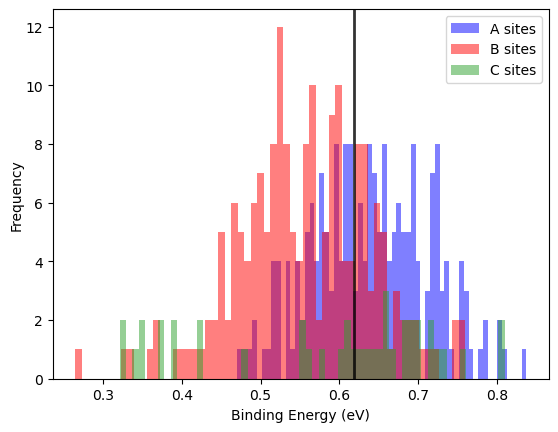

In [19]:
fig, ax = plt.subplots()
# Actually make the plot
ax.set_xlabel(r"Binding Energy (eV)")
ax.set_ylabel(
    r"Frequency", labelpad=1
)  # we already handled the x-label with ax1
ax.hist(energy_a_sites, bins=n_bins, ls='dashed', lw=3, fc=(0, 0, 1, 0.5), label="A sites") # blue, A sites
ax.hist(energy_b_sites, bins=n_bins, ls='dotted', lw=3, fc=(1, 0, 0, 0.5), label="B sites") # red, B sites 
ax.hist(energy_c_sites, bins=n_bins, ls='dotted', lw=3, fc="tab:green", alpha=0.5,label="C sites") # C sites 

# ax.set_xlim(0,1.1)

# Vertical line through cohesive energy
ax.axvline(x=cohesive_energy, color="black", linewidth=2, alpha=0.8, zorder=10) # linestyle="--"

ax.legend()
plt.show()

In [31]:
a_sites = len(energy_a_sites)
b_sites = len(energy_b_sites)
c_sites = len(energy_c_sites)
n_sites_binding = a_sites + b_sites + c_sites

print(f"A = {a_sites}, B = {b_sites}, C = {c_sites}")
print(f"{n_sites_binding = }")
n_sites_a_high_bound = len(energy_a_sites[energy_a_sites>cohesive_energy]) 
n_sites_b_high_bound = len(energy_b_sites[energy_b_sites>cohesive_energy])
n_sites_c_high_bound = len(energy_c_sites[energy_c_sites>cohesive_energy])
print(f"{n_sites_a_high_bound = }")
print(f"{n_sites_b_high_bound = }")
print(f"{n_sites_c_high_bound = }")
highly_bound_sites_percent = (n_sites_a_high_bound + n_sites_b_high_bound + n_sites_c_high_bound)/n_sites_binding * 100
print(f"{highly_bound_sites_percent = }")

A = 203, B = 191, C = 41
n_sites_binding = 435
n_sites_a_high_bound = 119
n_sites_b_high_bound = 48
n_sites_c_high_bound = 21
highly_bound_sites_percent = 43.2183908045977


/tmp/ipykernel_34218/548469134.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


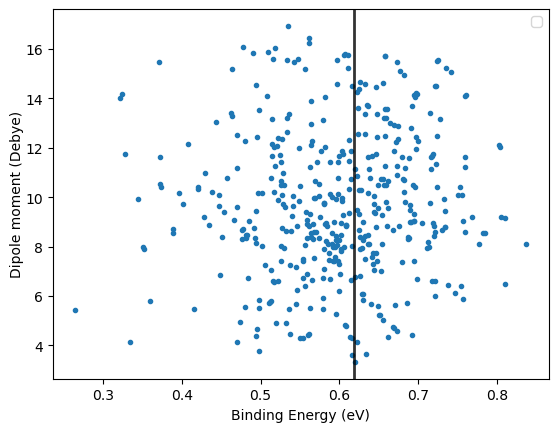

In [34]:
from ase.units import Debye

fig, ax = plt.subplots()
# Actually make the plot
ax.set_xlabel(r"Binding Energy (eV)")
ax.set_ylabel(
    r"Dipole moment (Debye)", labelpad=1
)  # we already handled the x-label with ax1

ax.plot(all_energies, all_dipole_moments/Debye, ls="None", marker='.')
# ax.set_xlim(0,1.1)

# Vertical line through cohesive energy
ax.axvline(x=cohesive_energy, color="black", linewidth=2, alpha=0.8, zorder=10) # linestyle="--"

ax.legend()
plt.show()